### Importing dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('../Datasets/loan_data.csv')
df=pd.DataFrame(df)

In [3]:
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

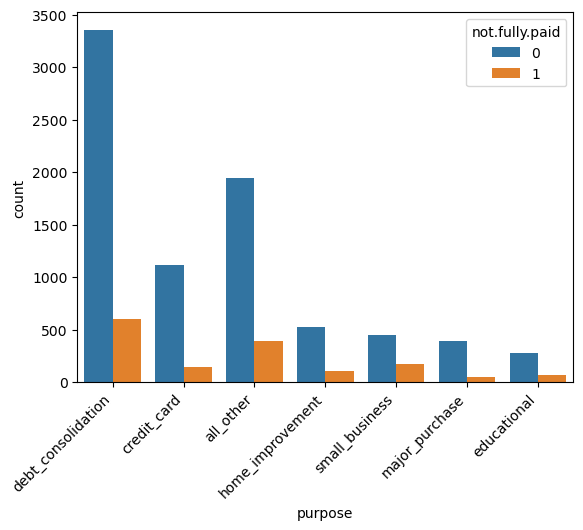

In [5]:
sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right')

### Data Preprocessing

In [6]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [7]:
df['purpose']=pd.factorize(df['purpose'])[0]

### Feature target division

In [8]:
X=df.drop(columns='not.fully.paid',axis=1)
y=df['not.fully.paid']

In [9]:
X.shape,y.shape

((9578, 13), (9578,))

### Train test split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [11]:
X_train.shape,y_train.shape

((7662, 13), (7662,))

### training model

In [12]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

### Model Evaluation

In [13]:
predicted_y_test=model.predict(X_test)
accuracy_score(predicted_y_test,y_test)

0.8147181628392485